<h1>nmlist with CNN (normalized,adam)</h1>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt


# Load Data Set nmist and printing dimentions test and train dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


# printing a train value with lavels  from data set

Image (#9): Which is digit '4'


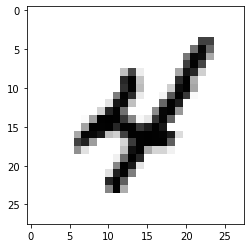

In [3]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

# normalize tehe picture and reshape the dimention

In [4]:
X_train = x_train.reshape(-1, 28*28*1).astype("float32") / 255.0
X_test = x_test.reshape(-1, 28*28*1).astype("float32") / 255.0
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 784)
Shape of y_train: (60000,)

Shape of x_test: (10000, 784)
Shape of y_test: (10000,)


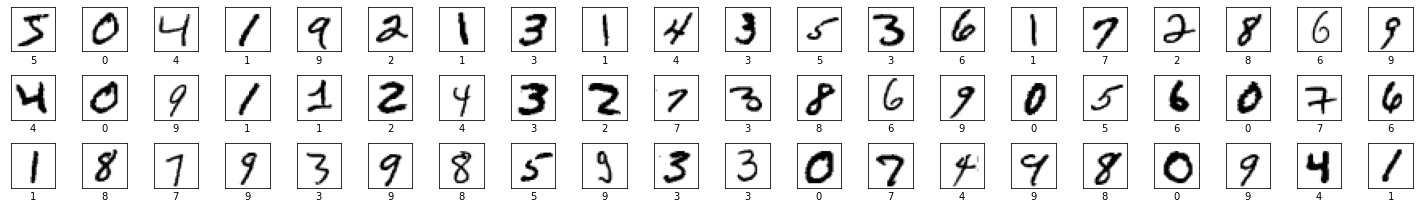

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [6]:
X_train = x_train.reshape(-1, 28*28*1).astype("float32") / 255.0
X_test = x_test.reshape(-1, 28*28*1).astype("float32") / 255.0

# creating model for train data set

In [7]:
model1 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28) hwew we use 128 filters and kernel size 5,5
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [8]:
model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# reshape the image dimention to fit in our model

In [9]:
x1_train=x_train.reshape(-1,28,28,1)
x1_test=x_test.reshape(-1,28,28,1)
print(x_train[0].shape)

(28, 28)


# use model1.fit to train the machine 

In [10]:
 h = model1.fit(x=x1_train, y=y_train, epochs=5,validation_split=0.2, batch_size=32 )

Epoch 1/6
1500/1500 [==============================] - 134s 89ms/step - loss: 1.0618 - accuracy: 0.8622 - val_loss: 0.0654 - val_accuracy: 0.9817
Epoch 2/6
1500/1500 [==============================] - 132s 88ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.0766 - val_accuracy: 0.9788
Epoch 3/6
1500/1500 [==============================] - 130s 87ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0903 - val_accuracy: 0.9763
Epoch 4/6
1500/1500 [==============================] - 130s 87ms/step - loss: 0.0512 - accuracy: 0.9836 - val_loss: 0.0661 - val_accuracy: 0.9837
Epoch 5/6
1500/1500 [==============================] - 130s 87ms/step - loss: 0.0434 - accuracy: 0.9873 - val_loss: 0.0572 - val_accuracy: 0.9834
Epoch 6/6
1500/1500 [==============================] - 133s 89ms/step - loss: 0.0339 - accuracy: 0.9901 - val_loss: 0.0698 - val_accuracy: 0.9812


# plot the result of training and show the training accuracy and validation accuracy also plot the loss 

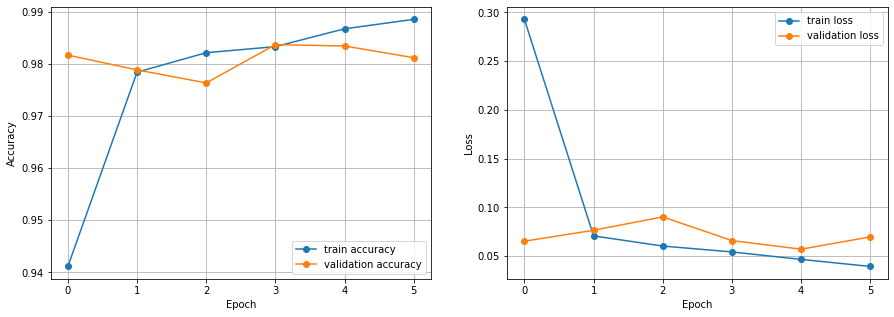

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# test data in our trained machine

In [12]:
test_loss, test_acc = model1.evaluate(x1_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 6s 17ms/step - loss: 0.0685 - accuracy: 0.9806

Test accuracy: 0.9805999994277954


# predict results for our test data

In [13]:
predictions = model1.predict(x1_test)

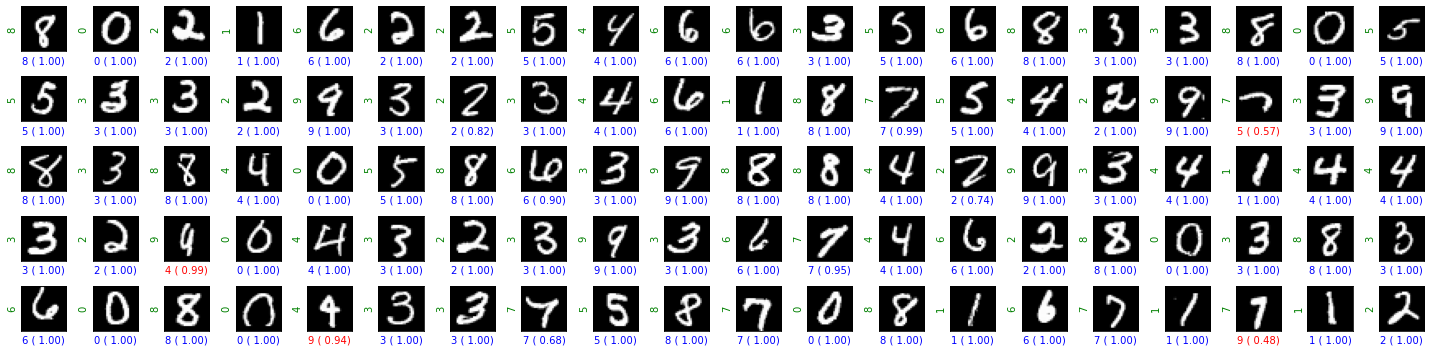

In [14]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x1_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model1.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [15]:
def test(i):
    img = x1_test[i]
    predictions = model1.predict([img.reshape(-1,28,28,1)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

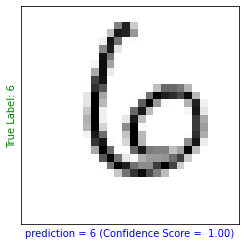

In [16]:
test(100)